In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def model_logistic(x,w):
    z = w[1]*x + w[0]
    f = 1 / (1.0 + np.exp(-z))
    return f

def loss_CE(f,y):
    loss = - (np.sum(y*np.log(f) + (1-y)*np.log(1-f))) / np.size(f)
    return loss

def grad_CE(x, y, f):
    x1 = np.vstack((np.ones_like(x), x))
    grad = (1.0/len(x)) * x1.dot((f-y).T)
    return grad


Text(0, 0.5, 'f(x)')

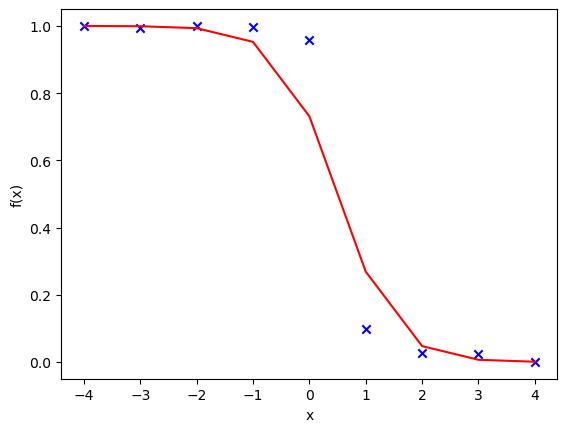

In [2]:
# Cooking up some data

x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
w_ideal = np.array([1.0, -2.0])
z = w_ideal[1]*x + w_ideal[0] + 2*np.random.randn(np.size(x))
y = 1 / (1.0 + np.exp(-z))

w = w_ideal
f = model_logistic(x,w)

# Plotting data
plt.scatter(x, y, c="b", marker='x')
plt.plot(x, f, c="r")
plt.xlabel("x")
plt.ylabel("f(x)")

343
[ 1.93054394 -3.2029895 ]


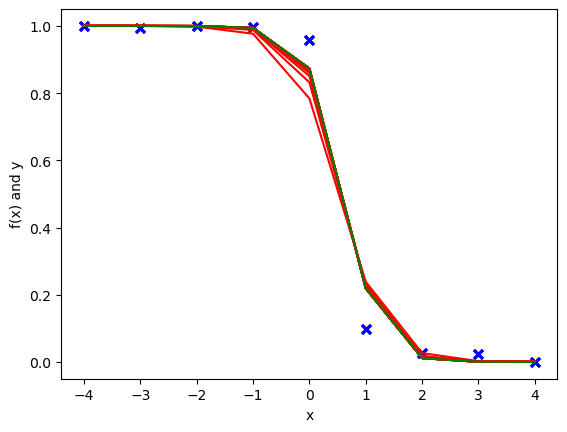

In [5]:
# Gradient Descent Algorithm on Logistic Model with Cross Entropy Loss Function

# Initialization
w = np.array([0, 6.00])
learning_rate = 3
min_abs_change = 1e-5
max_iter = 1000
iterations = 1

while True:
    f = model_logistic(x,w)
    grad = grad_CE(x,y,f)
    w_new = w - learning_rate*grad
    
    # Stopping Conditions
    if np.sum(abs(w_new - w)) < min_abs_change:
        break
    if iterations >= max_iter:
        break
        
    if iterations % (max_iter/50) == 0:
        # Plot Data
        plt.scatter(x, y, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x) and y")
        
    iterations += 1
    w = w_new
    
# Plot the Best Fit Line
plt.scatter(x, y, c="b", marker='x')
plt.plot(x, f, c="g")

print(iterations)
print(w)
        